jumlah titik terdeteksi =  1000


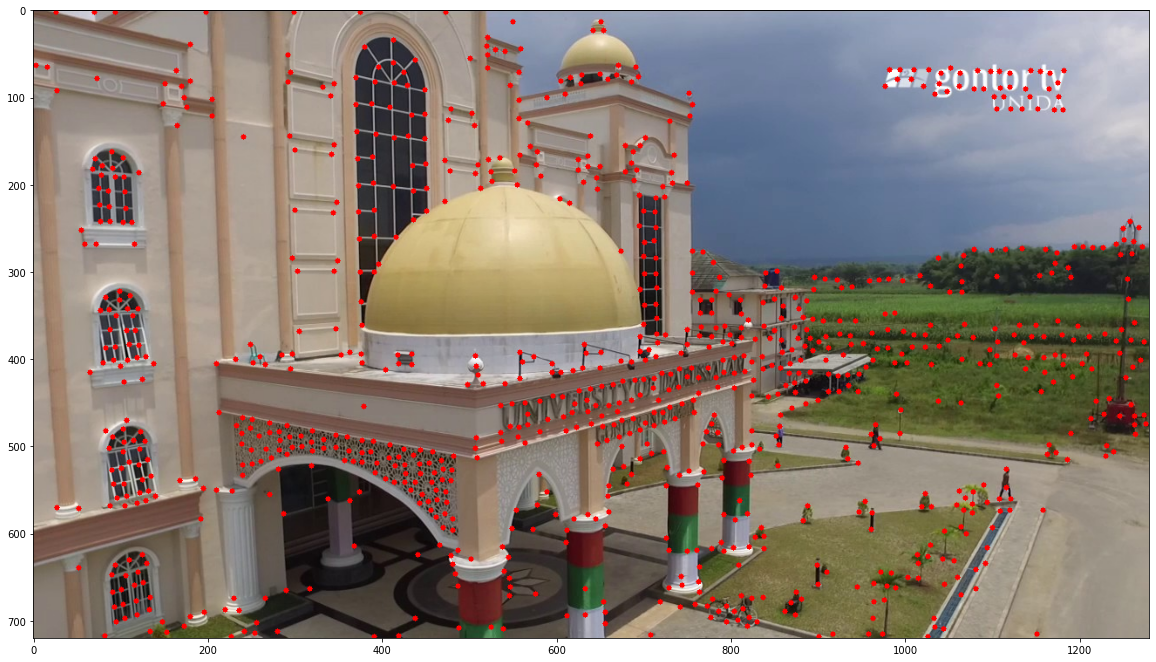

(<matplotlib.image.AxesImage at 0x7f86b10d3090>, None)

In [9]:
# Menggunakan Shi-Tomasi GFTT untuk deteksi ujung (corner detection)

import numpy as np
import cv2
from matplotlib import pyplot as plt


img = cv2.imread('/content/BAHAN UJIAN 7.jpeg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 


# deteksi pojok dengan GFTT
corners = cv2.goodFeaturesToTrack(gray,1000,0.01,10)
corners = np.int0(corners)

# menampilkan jumlah titik terdeteksi dengan fungsi numpy (np.ndarray.shape)
print("jumlah titik terdeteksi = ", corners.shape[0])

# untuk ditampilkan di Matplotlib, urutan band dibalik
rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# perbesar ukuran hasil plotting 
plt.rcParams["figure.figsize"] = (20,20)

# untuk tiap pojok yang terdeteksi, munculkan pada gambar
for i in corners:
    x,y = i.ravel()
    cv2.circle(rgb,(x,y),3,255,-1)
plt.imshow(rgb),plt.show()

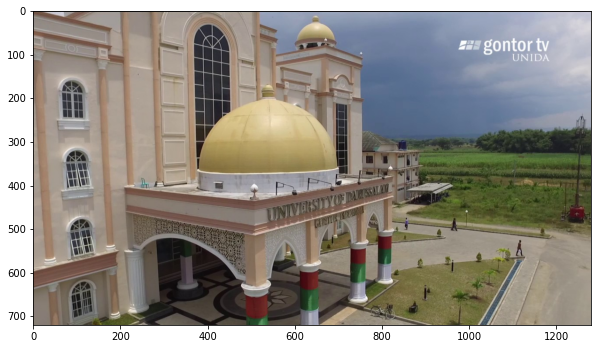

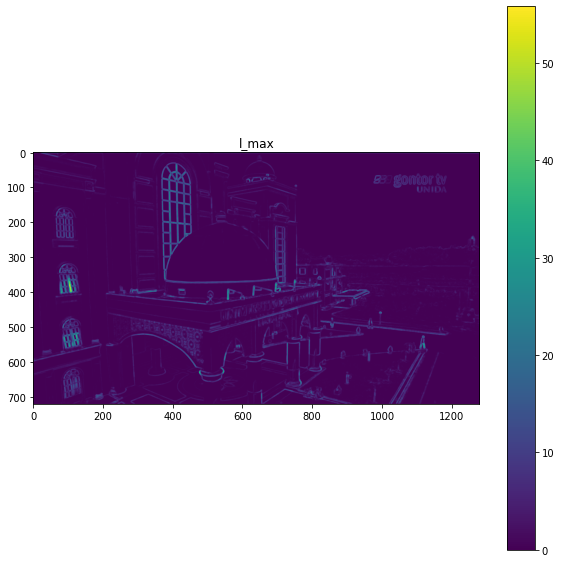

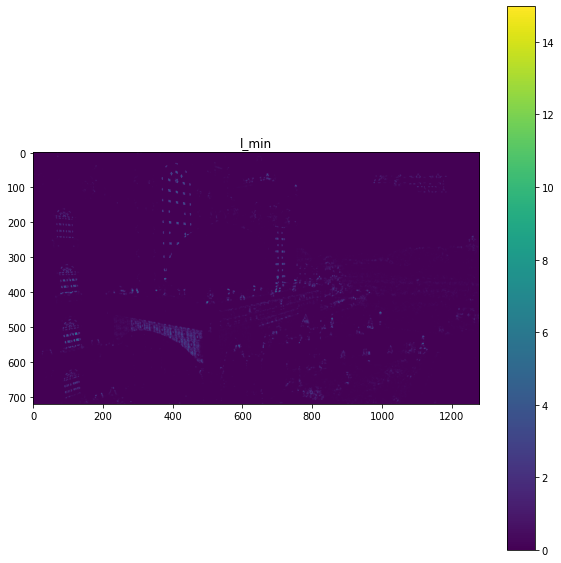

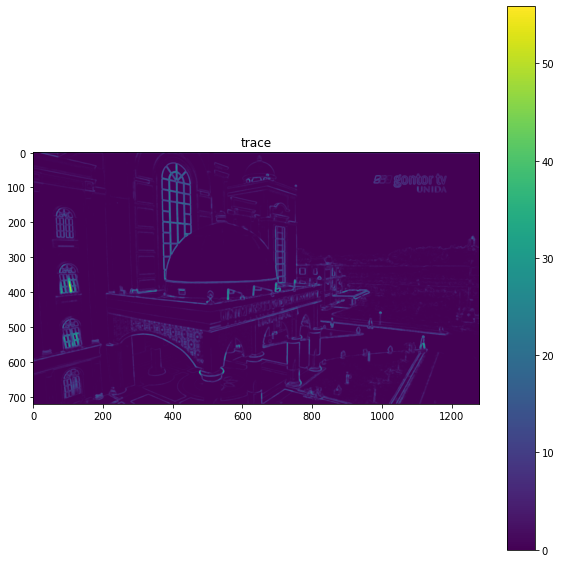

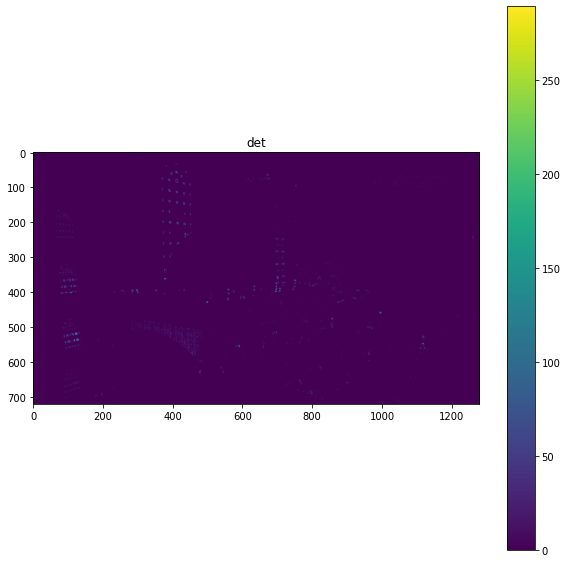

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in true_divide


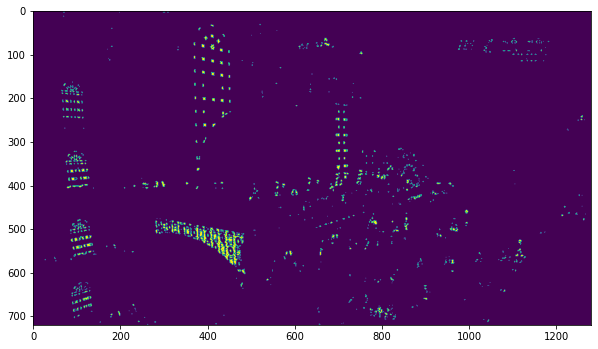

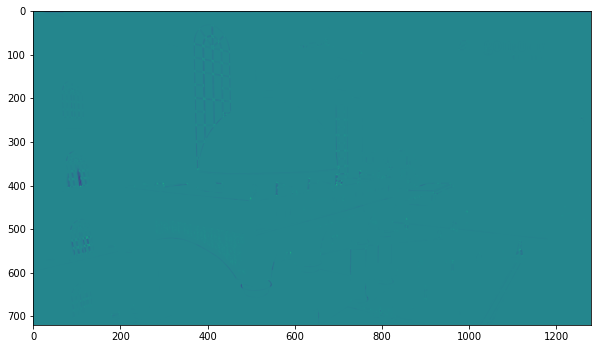

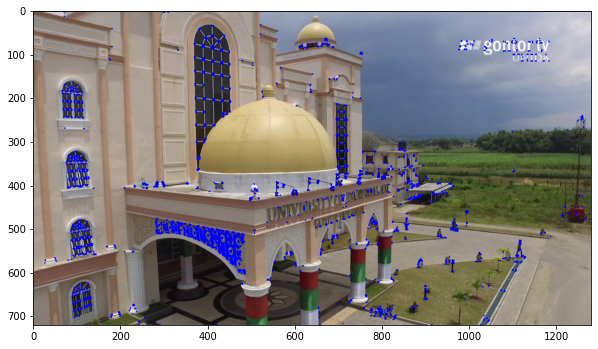

jumlah titik terdeteksi =  720


In [7]:
imgBGR = cv2.imread("/content/BAHAN UJIAN 7.jpeg")
imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2GRAY).astype(float)/255

plt.figure(figsize=(10, 10))
plt.imshow(imgRGB)
plt.show()

#derivatives in x and y dirs
kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
Ix = cv2.filter2D(img, -1, kernel_x)

kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
Iy = cv2.filter2D(img, -1, kernel_y)

window_size = 3
offset = int(np.floor(window_size/2))

l_max = np.zeros(img.shape)
l_min = np.zeros(img.shape)
det = np.zeros(img.shape)
trace = np.zeros(img.shape)

# for each window in image
for y in range(offset, img.shape[0]-offset):
    for x in range(offset, img.shape[1]-offset):
        
        # build window of intersting data 
        windowIx = Ix[y-offset:y+offset+1, x-offset:x+offset+1]
        windowIy = Iy[y-offset:y+offset+1, x-offset:x+offset+1]

        # this is added to be consistent with PCA
        # windowIx = windowIx-np.mean(windowIx)
        # windowIy = windowIy-np.mean(windowIy)

        # build second moments matrix
        Sxx = np.sum(windowIx*windowIx)
        Syy = np.sum(windowIy*windowIy)
        Sxy = np.sum(windowIx*windowIy)

        # eigendecomposition data
        H = np.array([[Sxx, Sxy],
                [Sxy, Syy]])
        L, V = np.linalg.eig(H)

        l_max[y,x] = np.maximum(L[0],L[1])
        l_min[y,x] = np.minimum(L[0],L[1])


        det[y, x] = (Sxx * Syy) - (Sxy**2)
        trace[y, x] = Sxx + Syy


plt.figure(figsize=(10, 10))
plt.imshow(l_max)
plt.colorbar()
plt.title("l_max")
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(l_min)
plt.colorbar()
plt.title("l_min")
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(trace)
plt.colorbar()
plt.title("trace")
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(det)
plt.colorbar()
plt.title("det")
plt.show()

harris = det/trace
harris[np.isnan(harris)] = 0

plt.figure(figsize=(10, 10))
plt.imshow(harris > harris.max()/10)
plt.show()

gray = np.float32(img)
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

plt.figure(figsize=(10, 10))
plt.imshow(dst)
plt.show()

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst, None)
# Threshold for an optimal value, it may vary depending on the image.
imgRGB[dst > 0.01*dst.max()] = [0, 0, 255]

plt.figure(figsize=(10, 10))
plt.imshow(imgRGB)
plt.show()

# berapa titik yang terdeteksi?
print("jumlah titik terdeteksi = ", len(dst))







